In [1]:
# === 0. Setup ===
import pandas as pd
import numpy as np
from pathlib import Path

DATA_DIR = Path("/Users/martinjaramillo/Documents/Unreal+Rokoko/data")

FILES = {
    "baseline": DATA_DIR / "BaseLine(SittingPosition).csv",
    "right":    DATA_DIR / "RightTurn_10times.csv",
    "left":     DATA_DIR / "LeftTurn_10times.csv",
}

# === 1. Load datasets ===
def normalize_headers(df):
    df = df.copy()
    df.columns = [str(c).strip().replace(" ", "_").replace("(", "_").replace(")", "") for c in df.columns]
    return df

datasets = {}
for name, path in FILES.items():
    df = pd.read_csv(path)
    df = normalize_headers(df)
    datasets[name] = df

# === 2. Show dataset info and stats ===
for name, df in datasets.items():
    print(f"\n===== {name.upper()} =====")
    print("Shape:", df.shape)
    print("Columns:", list(df.columns[:15]), "..." if len(df.columns)>15 else "")
    print("\nInfo:")
    print(df.info())
    print("\nMissing values per column:")
    print(df.isna().sum().sort_values(ascending=False).head(10))
    print("\nBasic stats (first 10 cols):")
    display(df.describe().iloc[:,:10])

# === 3. Decide on common numeric features ===
num_cols = {k: [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])] for k,df in datasets.items()}
common_cols = sorted(set(num_cols["baseline"]) & set(num_cols["right"]) & set(num_cols["left"]))
print("\nCommon numeric columns across all three datasets:", len(common_cols))

# === 4. Build a unified labeled dataset ===
# Add label column: 0 = baseline, 1 = right, 2 = left
all_data = []
for label, name in enumerate(["baseline","right","left"]):
    df = datasets[name][common_cols].copy()
    df["label"] = label
    all_data.append(df)

unified_df = pd.concat(all_data, ignore_index=True)

print("\nUnified dataset shape:", unified_df.shape)
print("Label distribution:\n", unified_df["label"].value_counts())
display(unified_df.head())


/var/folders/rr/22sc957x2097mq9520fj_3tw0000gn/T/ipykernel_5065/402777064.py:22: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)



===== BASELINE =====
Shape: (2745, 991)
Columns: ['Timestamp', 'Pelvis_position_x', 'Pelvis_position_y', 'Pelvis_position_z', 'Pelvis_velocity_x', 'Pelvis_velocity_y', 'Pelvis_velocity_z', 'Pelvis_acceleration_x', 'Pelvis_acceleration_y', 'Pelvis_acceleration_z', 'Pelvis_extension', 'Pelvis_lateral_flexion_rotation', 'Pelvis_axial_rotation', 'Pelvis_extension_velocity', 'Pelvis_lateral_flexion_rotation_velocity'] ...

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745 entries, 0 to 2744
Columns: 991 entries, Timestamp to RightDigit5DistalInterphalangeal_pronation_acceleration
dtypes: float64(990), object(1)
memory usage: 20.8+ MB
None

Missing values per column:
Timestamp                                    103
RightDigit1MetaCarpal_position_z             103
RightDigit1MetaCarpal_velocity_y             103
RightDigit1MetaCarpal_velocity_z             103
RightDigit1MetaCarpal_acceleration_x         103
RightDigit1MetaCarpal_acceleration_y         103
RightDigit1MetaCarpal_ac

,Timestamp,Pelvis_position_x,Pelvis_position_y,Pelvis_position_z,Pelvis_velocity_x,Pelvis_velocity_y,Pelvis_velocity_z,Pelvis_acceleration_x,Pelvis_acceleration_y,Pelvis_acceleration_z
count,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000
mean,22008.333460,-0.760363,0.600978,-0.557950,0.000459,0.000048,0.000288,0.000012,-0.000019,-0.000003
std,12713.733901,0.005289,0.000590,0.003609,0.001187,0.000805,0.001092,0.017868,0.011798,0.014850
min,0.000000,-0.772038,0.597575,-0.563759,-0.007081,-0.009574,-0.007310,-0.421643,-0.216079,-0.298047
25%,11004.250000,-0.764631,0.600828,-0.561273,0.000057,-0.000168,-0.000013,-0.004283,-0.002149,-0.003218
50%,22008.500000,-0.760587,0.601181,-0.559103,0.000445,0.000025,0.000304,0.000003,0.000000,-0.000210
75%,33012.750000,-0.755629,0.601325,-0.554808,0.000762,0.000243,0.000569,0.004293,0.002146,0.003218
max,44017.000000,-0.751799,0.601583,-0.550644,0.010804,0.005922,0.013368,0.417995,0.167370,0.317573



===== RIGHT =====
Shape: (2781, 991)
Columns: ['Timestamp', 'Pelvis_position_x', 'Pelvis_position_y', 'Pelvis_position_z', 'Pelvis_velocity_x', 'Pelvis_velocity_y', 'Pelvis_velocity_z', 'Pelvis_acceleration_x', 'Pelvis_acceleration_y', 'Pelvis_acceleration_z', 'Pelvis_extension', 'Pelvis_lateral_flexion_rotation', 'Pelvis_axial_rotation', 'Pelvis_extension_velocity', 'Pelvis_lateral_flexion_rotation_velocity'] ...

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Columns: 991 entries, Timestamp to RightDigit5DistalInterphalangeal_pronation_acceleration
dtypes: float64(991)
memory usage: 21.0 MB
None

Missing values per column:
Timestamp                                    176
RightDigit1MetaCarpal_position_z             176
RightDigit1MetaCarpal_velocity_y             176
RightDigit1MetaCarpal_velocity_z             176
RightDigit1MetaCarpal_acceleration_x         176
RightDigit1MetaCarpal_acceleration_y         176
RightDigit1MetaCarpal_acceleration_z   

,Timestamp,Pelvis_position_x,Pelvis_position_y,Pelvis_position_z,Pelvis_velocity_x,Pelvis_velocity_y,Pelvis_velocity_z,Pelvis_acceleration_x,Pelvis_acceleration_y,Pelvis_acceleration_z
count,2605.000000,2605.000000,2605.000000,2605.000000,2605.000000,2605.000000,2605.000000,2605.000000,2605.000000,2605.000000
mean,21700.000000,-0.567531,0.632677,-0.257445,0.001517,0.000054,0.003146,0.000152,-0.000047,0.000185
std,12535.717344,0.019267,0.000787,0.040621,0.001661,0.001134,0.001911,0.029966,0.015797,0.045584
min,0.000000,-0.602263,0.629881,-0.326270,-0.005296,-0.006791,-0.003015,-0.645450,-0.308120,-1.273519
25%,10850.000000,-0.584398,0.632208,-0.292662,0.000558,-0.000576,0.002001,-0.013517,-0.006866,-0.013519
50%,21700.000000,-0.566579,0.632722,-0.257276,0.001531,0.000104,0.003127,-0.000003,0.000002,0.000000
75%,32550.000000,-0.550967,0.633104,-0.221663,0.002514,0.000701,0.004222,0.014805,0.006652,0.014372
max,43400.000000,-0.536380,0.634698,-0.189671,0.013532,0.005894,0.026543,0.584484,0.317789,1.119618



===== LEFT =====
Shape: (2665, 991)
Columns: ['Timestamp', 'Pelvis_position_x', 'Pelvis_position_y', 'Pelvis_position_z', 'Pelvis_velocity_x', 'Pelvis_velocity_y', 'Pelvis_velocity_z', 'Pelvis_acceleration_x', 'Pelvis_acceleration_y', 'Pelvis_acceleration_z', 'Pelvis_extension', 'Pelvis_lateral_flexion_rotation', 'Pelvis_axial_rotation', 'Pelvis_extension_velocity', 'Pelvis_lateral_flexion_rotation_velocity'] ...

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Columns: 991 entries, Timestamp to RightDigit5DistalInterphalangeal_pronation_acceleration
dtypes: float64(991)
memory usage: 20.1 MB
None

Missing values per column:
Timestamp                                    144
RightDigit1MetaCarpal_position_z             144
RightDigit1MetaCarpal_velocity_y             144
RightDigit1MetaCarpal_velocity_z             144
RightDigit1MetaCarpal_acceleration_x         144
RightDigit1MetaCarpal_acceleration_y         144
RightDigit1MetaCarpal_acceleration_z    

,Timestamp,Pelvis_position_x,Pelvis_position_y,Pelvis_position_z,Pelvis_velocity_x,Pelvis_velocity_y,Pelvis_velocity_z,Pelvis_acceleration_x,Pelvis_acceleration_y,Pelvis_acceleration_z
count,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000
mean,21000.000000,-0.734580,0.613202,-0.535594,0.000447,0.000079,0.000456,-0.000024,0.000011,-0.000033
std,12131.572143,0.004166,0.001124,0.005773,0.002218,0.001355,0.002723,0.032070,0.014948,0.029184
min,0.000000,-0.747387,0.608369,-0.545143,-0.008090,-0.006169,-0.010929,-0.548462,-0.141192,-0.390943
25%,10500.000000,-0.737190,0.612759,-0.540361,-0.000951,-0.000805,-0.001395,-0.015011,-0.007724,-0.015903
50%,21000.000000,-0.733465,0.613198,-0.536822,0.000350,0.000114,0.000361,0.000429,-0.000428,-0.000644
75%,31500.000000,-0.731895,0.613860,-0.530569,0.001627,0.000919,0.002228,0.014799,0.007498,0.016312
max,42000.000000,-0.728095,0.615282,-0.523597,0.011054,0.004617,0.011938,0.487928,0.162643,0.393106



Common numeric columns across all three datasets: 990

Unified dataset shape: (8191, 991)
Label distribution:
 label
1    2781
0    2745
2    2665
Name: count, dtype: int64


,Chest_acceleration_x,Chest_acceleration_y,Chest_acceleration_z,Chest_position_x,Chest_position_y,Chest_position_z,Chest_velocity_x,Chest_velocity_y,Chest_velocity_z,Head_acceleration_x,...,Thorax_axial_rotation_acceleration,Thorax_axial_rotation_velocity,Thorax_extension,Thorax_extension_acceleration,Thorax_extension_velocity,Thorax_lateral_flexion_rotation,Thorax_lateral_flexion_rotation_acceleration,Thorax_lateral_flexion_rotation_velocity,Timestamp,label
0,0.000000,0.000000,0.000000,-0.800280,0.930372,-0.629221,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,-4.266913,0.000000,0.000000,-1.990408,0.000000,0.000000,0.0,0
1,-0.112653,-0.049138,-0.249767,-0.800311,0.930358,-0.629290,-0.001878,-0.000819,-0.004163,-0.213718,...,15.47184,0.257864,-4.261172,20.668030,0.344467,-1.988613,6.460047,0.107667,17.0,0
2,-0.153852,0.095057,0.097418,-0.800385,0.930371,-0.629332,-0.004442,0.000765,-0.002539,-0.254273,...,12.18796,0.460997,-4.255884,-1.629067,0.317316,-1.978244,30.870720,0.622179,33.0,0
3,-0.009871,0.056005,-0.038195,-0.800462,0.930399,-0.629385,-0.004606,0.001699,-0.003176,-0.138402,...,73.67533,1.688919,-4.248330,8.153913,0.453215,-1.962298,20.074930,0.956762,50.0,0
4,0.148487,-0.212860,-0.359416,-0.800497,0.930368,-0.629538,-0.002131,-0.001849,-0.009166,0.111365,...,47.97854,2.488561,-4.234708,21.845640,0.817308,-1.948546,-7.899847,0.825098,67.0,0


/var/folders/rr/22sc957x2097mq9520fj_3tw0000gn/T/ipykernel_5065/2907779566.py:23: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(p)
/var/folders/rr/22sc957x2097mq9520fj_3tw0000gn/T/ipykernel_5065/2907779566.py:25: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.replace([np.inf, -np.inf], np.nan).interpolate(limit_direction="both").fillna(0.0)


Selected features (steering-relevant): 842
Saved:
  X_seq.npy   : (20, 60, 842) (N, T, D)
  y_seq.npy   : (20,) (N,)
  baseline_vec: (842,) (D,)
  columns.txt : 842 columns
  norm.json   : mean/std + frames


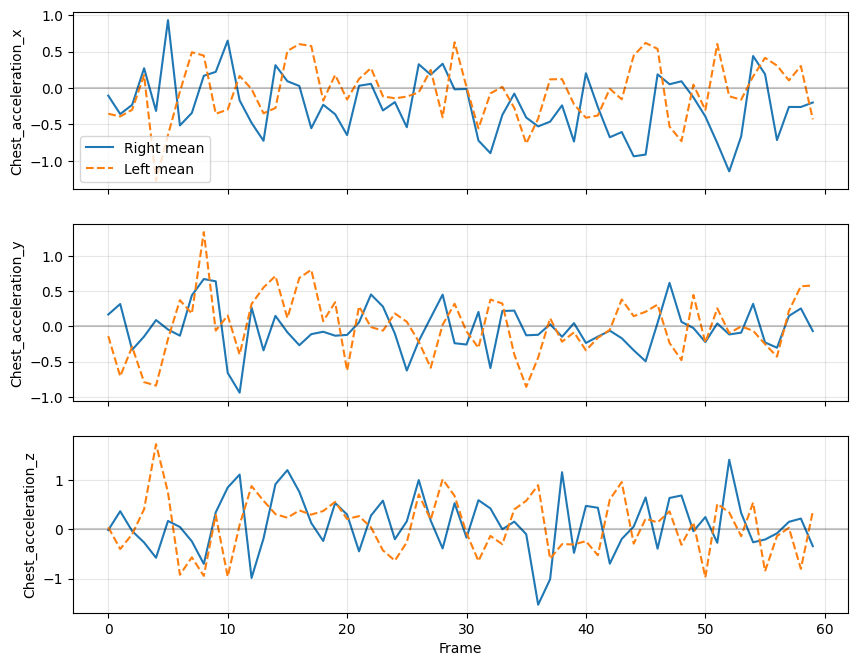

In [2]:
# =========================
# NEXT STEP: Build ML-ready sequence dataset
# =========================
import re, json, numpy as np, pandas as pd
from pathlib import Path

PROJECT_ROOT = Path.cwd()
DATA_DIR = (PROJECT_ROOT / "data").resolve()
OUT_DIR  = (DATA_DIR / "processed").resolve()
OUT_DIR.mkdir(parents=True, exist_ok=True)

# ---- Load (re-read to make cell self-contained) ----
def norm_headers(df):
    df = df.copy()
    df.columns = (
        df.columns.str.strip()
        .str.replace(r"\s+", "_", regex=True)
        .str.replace(r"[()\[\]/\\\-]", "_", regex=True)
    )
    return df

def load_df(p): 
    df = pd.read_csv(p)
    df = norm_headers(df)
    df = df.replace([np.inf, -np.inf], np.nan).interpolate(limit_direction="both").fillna(0.0)
    return df

BASELINE = load_df(DATA_DIR / "BaseLine(SittingPosition).csv")
RIGHT    = load_df(DATA_DIR / "RightTurn_10times.csv")
LEFT     = load_df(DATA_DIR / "LeftTurn_10times.csv")

# ---- Choose STEERING-RELEVANT columns (upper body + wrists/hands) ----
# Keep overlap only, then filter by name patterns
common = sorted(set(BASELINE.columns) & set(RIGHT.columns) & set(LEFT.columns))

PATTERNS = [
    r"Shoulder", r"Arm", r"Forearm", r"Wrist", r"Hand", r"Digit",  # arms & hands
    r"Clavicle", r"Scapula", r"Thorax", r"Chest", r"Spine", r"Neck", r"Head",  # upper-body stabilizers
]
def keep_by_patterns(cols, pats):
    rx = re.compile("|".join(pats), re.IGNORECASE)
    return [c for c in cols if rx.search(c)]

# always keep Timestamp if present (for FPS/ordering), then drop it from features later
cols_keep = keep_by_patterns(common, PATTERNS)
if "Timestamp" in common and "Timestamp" not in cols_keep:
    cols_keep = ["Timestamp"] + cols_keep

# ---- Final feature list (numeric, nonzero variance across RIGHT+LEFT) ----
num = []
for c in cols_keep:
    if pd.api.types.is_numeric_dtype(RIGHT[c]) and pd.api.types.is_numeric_dtype(LEFT[c]) and pd.api.types.is_numeric_dtype(BASELINE[c]):
        num.append(c)

feat_cols = [c for c in num if c != "Timestamp"]
# drop near-constant features over turning motions
def nonzero_var(df, cols, tol=1e-10):
    return [c for c in cols if float(df[c].var()) > tol]

active_R = nonzero_var(RIGHT, feat_cols)
active_L = nonzero_var(LEFT,  feat_cols)
active_cols = sorted(set(active_R) | set(active_L))
print(f"Selected features (steering-relevant): {len(active_cols)}")

# ---- Normalization using BASELINE (center at sitting position) ----
base_mean = BASELINE[active_cols].median(axis=0).to_numpy(np.float32)  # robust center
base_std  = BASELINE[active_cols].std(axis=0).replace(0, 1e-6).to_numpy(np.float32)

def zscore(df, cols, mu, sd):
    X = df[cols].to_numpy(np.float32)
    return (X - mu) / sd

# ---- Segment each turn file into 10 trials and time-normalize to 60 frames ----
OUT_FRAMES = 60
def uniform_segments(n, n_segments):
    b = np.linspace(0, n, n_segments+1, dtype=int)
    return [(int(b[i]), int(b[i+1])) for i in range(n_segments)]

def time_norm(mat, frames=60):
    T, D = mat.shape
    t  = np.linspace(0, 1, max(T, 2))
    tn = np.linspace(0, 1, frames)
    out = np.empty((frames, D), dtype=np.float32)
    for j in range(D):
        out[:, j] = np.interp(tn, t, mat[:, j])
    return out

def build_trials(df_raw):
    segs = uniform_segments(len(df_raw), 10)  # 10 turns in each file
    trials = []
    for s,e in segs:
        Z = zscore(df_raw.iloc[s:e], active_cols, base_mean, base_std)
        trials.append(time_norm(Z, OUT_FRAMES))
    return np.stack(trials, axis=0)  # (10, 60, D)

right_trials = build_trials(RIGHT)
left_trials  = build_trials(LEFT)

# ---- Baseline vector (normalized) ----
baseline_vec = ((BASELINE[active_cols].median(axis=0).to_numpy(np.float32) - base_mean) / base_std)

# ---- Pack tensors for training ----
X_seq = np.concatenate([right_trials, left_trials], axis=0)          # (20, 60, D)
y_seq = np.concatenate([np.ones(10, int), np.zeros(10, int)], axis=0)  # 1=right, 0=left

# ---- Save everything for training + streaming ----
np.save(OUT_DIR / "X_seq.npy", X_seq)
np.save(OUT_DIR / "y_seq.npy", y_seq)
np.save(OUT_DIR / "baseline_vec.npy", baseline_vec)
with open(OUT_DIR / "columns.txt", "w") as f:
    for c in active_cols: f.write(c + "\n")
norm = {"mean": base_mean.tolist(), "std": base_std.tolist(), "out_frames": OUT_FRAMES}
with open(OUT_DIR / "norm.json", "w") as f: json.dump(norm, f, indent=2)

print("Saved:")
print("  X_seq.npy   :", X_seq.shape, "(N, T, D)")
print("  y_seq.npy   :", y_seq.shape,   "(N,)")
print("  baseline_vec:", baseline_vec.shape, "(D,)")
print("  columns.txt :", len(active_cols), "columns")
print("  norm.json   :", "mean/std + frames")

# ---- Quick peek: first 3 dims of the class means ----
R_mean = right_trials.mean(axis=0)
L_mean = left_trials.mean(axis=0)
import matplotlib.pyplot as plt
k = min(3, X_seq.shape[-1]); t = np.arange(OUT_FRAMES)
fig, axes = plt.subplots(k, 1, figsize=(10, 2.6*k), sharex=True)
if k == 1: axes = [axes]
for i in range(k):
    axes[i].plot(t, R_mean[:, i], label="Right mean")
    axes[i].plot(t, L_mean[:, i], label="Left mean", linestyle="--")
    axes[i].axhline(0.0, color="k", alpha=0.2)  # baseline-normalized center
    axes[i].set_ylabel(active_cols[i])
    axes[i].grid(alpha=0.3)
axes[-1].set_xlabel("Frame")
axes[0].legend()
plt.show()

In [3]:
# =========================
# SIMPLE GRU TRAINING (left vs right)
# =========================
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# 1) Load preprocessed tensors
X = np.load("data/processed/X_seq.npy")   # (N, T, D)
y = np.load("data/processed/y_seq.npy")   # (N,)
print("X:", X.shape, "y:", y.shape)

# 2) Torch datasets
X_t = torch.tensor(X, dtype=torch.float32)   # (N,T,D)
y_t = torch.tensor(y, dtype=torch.long)      # (N,)
ds = TensorDataset(X_t, y_t)
dl = DataLoader(ds, batch_size=4, shuffle=True)

# 3) Simple GRU model
class SteeringGRU(nn.Module):
    def __init__(self, D, H=64, num_classes=2):
        super().__init__()
        self.gru = nn.GRU(D, H, batch_first=True)
        self.fc  = nn.Linear(H, num_classes)
    def forward(self, x):
        out, _ = self.gru(x)        # (B,T,H)
        last = out[:,-1,:]          # use last hidden state
        return self.fc(last)

model = SteeringGRU(D=X.shape[2])
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
crit = nn.CrossEntropyLoss()

# 4) Train
for epoch in range(30):
    total, correct = 0, 0
    for xb, yb in dl:
        opt.zero_grad()
        preds = model(xb)
        loss = crit(preds, yb)
        loss.backward()
        opt.step()
        # accuracy
        total += len(yb)
        correct += (preds.argmax(1)==yb).sum().item()
    print(f"Epoch {epoch+1:02d} | Loss {loss.item():.4f} | Acc {correct/total:.2f}")

# 5) Save model
torch.save(model.state_dict(), "data/processed/steering_gru.pth")
print("Saved model to data/processed/steering_gru.pth")

X: (20, 60, 842) y: (20,)
Epoch 01 | Loss 0.3092 | Acc 0.60
Epoch 02 | Loss 0.1431 | Acc 1.00
Epoch 03 | Loss 0.1018 | Acc 1.00
Epoch 04 | Loss 0.0525 | Acc 1.00
Epoch 05 | Loss 0.0683 | Acc 1.00
Epoch 06 | Loss 0.0492 | Acc 1.00
Epoch 07 | Loss 0.0398 | Acc 1.00
Epoch 08 | Loss 0.0315 | Acc 1.00
Epoch 09 | Loss 0.0172 | Acc 1.00
Epoch 10 | Loss 0.0228 | Acc 1.00
Epoch 11 | Loss 0.0201 | Acc 1.00
Epoch 12 | Loss 0.0190 | Acc 1.00
Epoch 13 | Loss 0.0224 | Acc 1.00
Epoch 14 | Loss 0.0112 | Acc 1.00
Epoch 15 | Loss 0.0145 | Acc 1.00
Epoch 16 | Loss 0.0085 | Acc 1.00
Epoch 17 | Loss 0.0168 | Acc 1.00
Epoch 18 | Loss 0.0117 | Acc 1.00
Epoch 19 | Loss 0.0145 | Acc 1.00
Epoch 20 | Loss 0.0133 | Acc 1.00
Epoch 21 | Loss 0.0045 | Acc 1.00
Epoch 22 | Loss 0.0058 | Acc 1.00
Epoch 23 | Loss 0.0056 | Acc 1.00
Epoch 24 | Loss 0.0060 | Acc 1.00
Epoch 25 | Loss 0.0083 | Acc 1.00
Epoch 26 | Loss 0.0046 | Acc 1.00
Epoch 27 | Loss 0.0090 | Acc 1.00
Epoch 28 | Loss 0.0087 | Acc 1.00
Epoch 29 | Loss 0.0040

In [4]:
# =========================
# CONDITIONAL GRU SEQUENCE GENERATOR
# =========================
import json, math, numpy as np, torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Load normalized training sequences
X = np.load("data/processed/X_seq.npy")   # (N, T, D) normalized (baseline-centered)
y = np.load("data/processed/y_seq.npy")   # (N,) 1=right, 0=left
print("X:", X.shape, "y:", y.shape)

N,T,D = X.shape
num_classes = 2

# Torch tensors
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.long)

# We train as sequence-to-sequence: model sees (label + time) and learns to output the target frame at each step.
# Inputs per step = [class_embed | time_embed]
class ConditionalGRU(nn.Module):
    def __init__(self, D_out, H=128, num_classes=2, time_dim=16):
        super().__init__()
        self.class_emb = nn.Embedding(num_classes, 16)
        self.time_fc   = nn.Linear(1, time_dim)  # simple scalar time in [0,1] -> embedding
        self.gru_in    = 16 + time_dim
        self.gru       = nn.GRU(self.gru_in, H, batch_first=True)
        self.head      = nn.Linear(H, D_out)

    def forward(self, labels, T_steps):
        """
        labels: (B,) long
        T_steps: int
        returns: (B, T, D_out)
        """
        B = labels.shape[0]
        # build time embedding [0..1] for each frame
        t = torch.linspace(0, 1, T_steps, device=labels.device).unsqueeze(0).unsqueeze(-1).repeat(B,1,1)  # (B,T,1)
        t_emb = torch.tanh(self.time_fc(t))              # (B,T,time_dim)
        c_emb = self.class_emb(labels).unsqueeze(1)      # (B,1,16)
        c_tile = c_emb.repeat(1, T_steps, 1)             # (B,T,16)
        x_in = torch.cat([c_tile, t_emb], dim=-1)        # (B,T,16+time_dim)
        out,_ = self.gru(x_in)                           # (B,T,H)
        yhat  = self.head(out)                           # (B,T,D)
        return yhat

model = ConditionalGRU(D_out=D, H=128, num_classes=num_classes).train()
opt = torch.optim.Adam(model.parameters(), lr=3e-3)
crit = nn.MSELoss()

# DataLoader (tiny dataset; small batch fine)
ds = TensorDataset(X_t, y_t)
dl = DataLoader(ds, batch_size=4, shuffle=True)

best = math.inf
for epoch in range(120):
    epoch_loss = 0.0
    for xb, yb in dl:
        opt.zero_grad()
        yhat = model(yb, T)         # condition on labels only (no teacher forcing input)
        loss = crit(yhat, xb)
        loss.backward()
        opt.step()
        epoch_loss += loss.item() * len(yb)
    epoch_loss /= len(ds)
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1:03d} | MSE {epoch_loss:.6f}")
    if epoch_loss < best:
        best = epoch_loss
        torch.save(model.state_dict(), "data/processed/sequence_gru.pth")

print("Saved best model → data/processed/sequence_gru.pth  (lowest MSE:", best, ")")

X: (20, 60, 842) y: (20,)
Epoch 010 | MSE 15.667541
Epoch 020 | MSE 8.177359
Epoch 030 | MSE 6.042912
Epoch 040 | MSE 5.316591
Epoch 050 | MSE 5.074328
Epoch 060 | MSE 4.982066
Epoch 070 | MSE 4.953961
Epoch 080 | MSE 4.947013
Epoch 090 | MSE 4.952163
Epoch 100 | MSE 4.934948
Epoch 110 | MSE 4.945335
Epoch 120 | MSE 4.944068
Saved best model → data/processed/sequence_gru.pth  (lowest MSE: 4.933191156387329 )


In [5]:
# =========================
# INFER + SAVE + (OPTIONAL) STREAM TO UNREAL
# =========================
import json, numpy as np, torch
from pathlib import Path

DATA_DIR = Path("data/processed")

# Load artifacts
with open(DATA_DIR/"norm.json","r") as f:
    norm = json.load(f)
mu = np.array(norm["mean"], dtype=np.float32)
sd = np.array(norm["std"],  dtype=np.float32)
T  = int(norm["out_frames"])

# columns order
cols = [c.strip() for c in (DATA_DIR/"columns.txt").read_text().splitlines()]
D = len(cols)

# Reload model
class ConditionalGRU(torch.nn.Module):
    def __init__(self, D_out, H=128, num_classes=2, time_dim=16):
        super().__init__()
        self.class_emb = torch.nn.Embedding(num_classes, 16)
        self.time_fc   = torch.nn.Linear(1, time_dim)
        self.gru       = torch.nn.GRU(16+time_dim, H, batch_first=True)
        self.head      = torch.nn.Linear(H, D_out)
    def forward(self, labels, T_steps):
        B = labels.shape[0]
        t = torch.linspace(0,1,T_steps, device=labels.device).unsqueeze(0).unsqueeze(-1).repeat(B,1,1)
        t_emb = torch.tanh(self.time_fc(t))
        c_emb = self.class_emb(labels).unsqueeze(1).repeat(1,T_steps,1)
        x_in  = torch.cat([c_emb, t_emb], dim=-1)
        out,_ = self.gru(x_in)
        return self.head(out)

model = ConditionalGRU(D_out=D)
model.load_state_dict(torch.load(DATA_DIR/"sequence_gru.pth", map_location="cpu"))
model.eval()

def generate_sequence(label:int):
    with torch.no_grad():
        yb = torch.tensor([label], dtype=torch.long)
        seq = model(yb, T).squeeze(0).cpu().numpy()     # (T,D) normalized
    # de-normalize back to raw units for Unreal
    seq_denorm = seq * sd + mu
    return seq_denorm  # (T,D)

# Make both curves and save
gen_right = generate_sequence(1)
gen_left  = generate_sequence(0)

np.save(DATA_DIR/"gen_right.npy", gen_right)
np.save(DATA_DIR/"gen_left.npy",  gen_left)

# Also write CSV with headers for quick inspection
import pandas as pd
pd.DataFrame(gen_right, columns=cols).to_csv(DATA_DIR/"gen_right.csv", index=False)
pd.DataFrame(gen_left,  columns=cols).to_csv(DATA_DIR/"gen_left.csv",  index=False)

print("Saved:")
print(" ", DATA_DIR/"gen_right.npy")
print(" ", DATA_DIR/"gen_left.npy")
print(" ", DATA_DIR/"gen_right.csv")
print(" ", DATA_DIR/"gen_left.csv")

# ---------- OPTIONAL: stream to Unreal via OSC (run Unreal OSC server on port 8000) ----------
# This streams exactly one sequence you choose, at ~60 FPS, sending one address per column.
# In Unreal, bind to addresses: /mh/idle/<columnName> (same names as columns.txt)
try:
    from pythonosc.udp_client import SimpleUDPClient
    import time
    HOST, PORT = "127.0.0.1", 8000
    client = SimpleUDPClient(HOST, PORT)

    def stream_sequence(seq, fps=60):
        dt = 1.0/float(fps)
        for f in range(seq.shape[0]):
            row = seq[f]
            for i, name in enumerate(cols):
                client.send_message(f"/mh/idle/{name}", float(row[i]))
            # progress channels useful for blending in UE
            client.send_message("/mh/steer/right", float(f/(seq.shape[0]-1)))
            client.send_message("/mh/steer/left",  0.0)
            time.sleep(dt)
        client.send_message("/mh/steer/right", 0.0)
        client.send_message("/mh/steer/left",  0.0)

    # Example: stream generated RIGHT motion (uncomment to send immediately)
    # stream_sequence(gen_right, fps=60)

    print("OSC streamer ready. Call stream_sequence(gen_right) or stream_sequence(gen_left).")
except Exception as e:
    print("OSC optional streamer not available:", e)

Saved:
  data/processed/gen_right.npy
  data/processed/gen_left.npy
  data/processed/gen_right.csv
  data/processed/gen_left.csv
OSC streamer ready. Call stream_sequence(gen_right) or stream_sequence(gen_left).


X: (20, 60, 842) y: (20,) D: 842 Frames: 60
Per-feature std (normalized) — min/median/max: 0.05327786 1.3964427 30.205856
gen_right OK: (60, 842)
gen_left  OK: (60, 842)


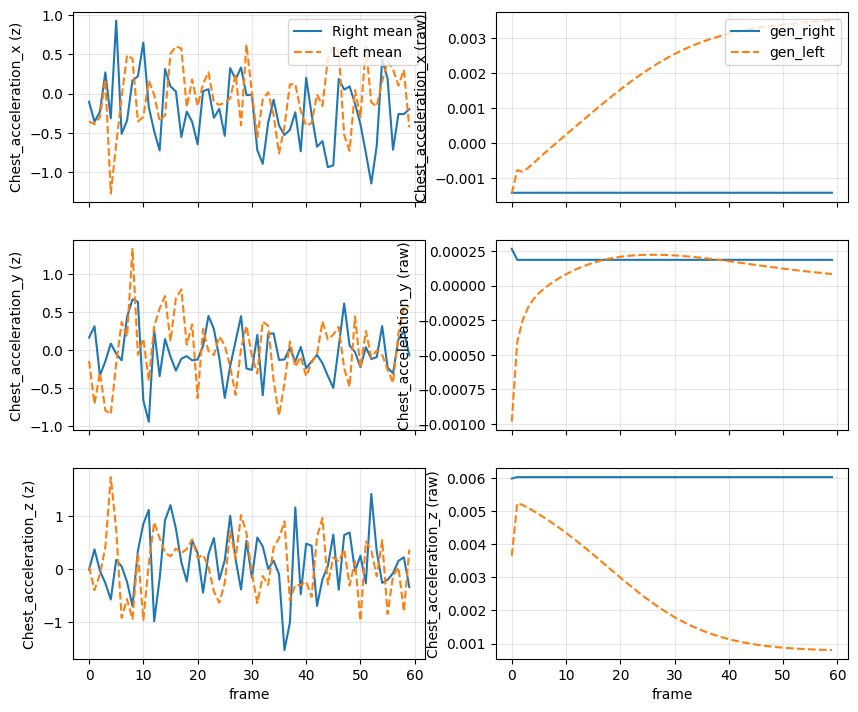

In [6]:
import json, numpy as np, pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

P = Path("data/processed")
X = np.load(P/"X_seq.npy")         # (N,60,D) normalized
y = np.load(P/"y_seq.npy")         # (N,)
cols = [c.strip() for c in (P/"columns.txt").read_text().splitlines()]
norm = json.loads((P/"norm.json").read_text())
mu, sd, T = np.array(norm["mean"]), np.array(norm["std"]), int(norm["out_frames"])

print("X:", X.shape, "y:", y.shape, "D:", len(cols), "Frames:", T)
assert np.isfinite(X).all(), "Found non-finite values in X"
print("Per-feature std (normalized) — min/median/max:", X.std(axis=(0,1)).min(), np.median(X.std(axis=(0,1))), X.std(axis=(0,1)).max())

# Compare generated outputs if you made them:
gen_right = np.load(P/"gen_right.npy") if (P/"gen_right.npy").exists() else None
gen_left  = np.load(P/"gen_left.npy")  if (P/"gen_left.npy").exists()  else None
if gen_right is not None:
    assert gen_right.shape == (T,len(cols))
    assert np.isfinite(gen_right).all()
    print("gen_right OK:", gen_right.shape)
if gen_left is not None:
    assert gen_left.shape == (T,len(cols))
    assert np.isfinite(gen_left).all()
    print("gen_left  OK:", gen_left.shape)

# Quick visual: 3 representative channels (normalized & denormalized)
k = min(3, len(cols))
t = np.arange(T)
fig, axes = plt.subplots(k, 2, figsize=(10, 2.8*k), sharex='col')
for i in range(k):
    xr = X[y==1][:, :, i].mean(axis=0)
    xl = X[y==0][:, :, i].mean(axis=0)
    axes[i,0].plot(t, xr, label="Right mean")
    axes[i,0].plot(t, xl, label="Left mean", ls="--")
    axes[i,0].set_ylabel(f"{cols[i]} (z)")
    axes[i,0].grid(alpha=.3)
    if gen_right is not None and gen_left is not None:
        gr = gen_right[:, i]
        gl = gen_left[:, i]
        axes[i,1].plot(t, gr, label="gen_right")
        axes[i,1].plot(t, gl, label="gen_left", ls="--")
        axes[i,1].set_ylabel(f"{cols[i]} (raw)")
        axes[i,1].grid(alpha=.3)

axes[0,0].legend(loc="upper right"); 
if gen_right is not None: axes[0,1].legend(loc="upper right")
axes[-1,0].set_xlabel("frame"); axes[-1,1].set_xlabel("frame")
plt.show()

In [7]:
# --- Start a minimal OSC receiver (prints a sample & counts) ---
import threading, socket, struct, time

PORT = 8000
stop_flag = False
recv_count = 0
addr_counts = {}

def _padr4(b):  # OSC padding (len to multiple of 4)
    return b + b'\x00' * ((4 - (len(b) % 4)) % 4)

def decode_osc_address(packet):
    # naive: read up to first \0 as address
    i = packet.find(b'\x00')
    if i == -1: return "?"
    return packet[:i].decode('utf-8', errors='ignore')

def osc_receiver():
    global recv_count
    s = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
    s.bind(('127.0.0.1', PORT))
    s.settimeout(0.5)
    shown = 0
    t0 = time.time()
    while not stop_flag:
        try:
            data, _ = s.recvfrom(8192)
            recv_count += 1
            addr = decode_osc_address(data)
            addr_counts[addr] = addr_counts.get(addr,0)+1
            if shown < 10:
                print("RX", addr)
                shown += 1
        except socket.timeout:
            pass
    print("Receiver stopped. Duration:", time.time()-t0)
    s.close()

thr = threading.Thread(target=osc_receiver, daemon=True)
thr.start()

# --- Sender using stdlib (no python-osc dependency) ---
import json, numpy as np
from pathlib import Path

def osc_msg(address:str, *floats:float) -> bytes:
    # OSC: address\0 padded, typetags ",f..." \0 padded, then big-endian 32-bit floats
    addr_bin = _padr4(address.encode('utf-8') + b'\x00')
    tags = "," + "f"*len(floats)
    tags_bin = _padr4(tags.encode('utf-8') + b'\x00')
    args_bin = b''.join(struct.pack(">f", float(x)) for x in floats)
    return addr_bin + tags_bin + args_bin

def stream_sequence(seq:np.ndarray, columns:list[str], fps=60, max_cols=20):
    dt = 1.0/float(fps)
    sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
    for f in range(seq.shape[0]):
        row = seq[f]
        # send only first N columns for the loopback test to keep console sane
        for i, name in enumerate(columns[:max_cols]):
            sock.sendto(osc_msg(f"/mh/idle/{name}", float(row[i])), ('127.0.0.1', PORT))
        # progress helper
        sock.sendto(osc_msg("/mh/steer/right", float(f/(seq.shape[0]-1))), ('127.0.0.1', PORT))
        time.sleep(dt)
    # reset
    sock.sendto(osc_msg("/mh/steer/right", 0.0), ('127.0.0.1', PORT))
    sock.sendto(osc_msg("/mh/steer/left",  0.0), ('127.0.0.1', PORT))
    sock.close()

# load generated sequence and columns
P = Path("data/processed")
seq = np.load(P/"gen_right.npy")    # or gen_left.npy
columns = [c.strip() for c in (P/"columns.txt").read_text().splitlines()]

t0 = time.time()
stream_sequence(seq, columns, fps=60, max_cols=20)  # stream 20 channels to keep it light
time.sleep(0.3)
stop_flag = True
thr.join()

print("Total received packets:", recv_count)
print("Unique addresses seen:", len(addr_counts))
print("Sample address counts (first 10):", list(addr_counts.items())[:10])
print("Elapsed:", time.time()-t0, "sec")

RX /mh/idle/Chest_acceleration_x
RX /mh/idle/Chest_acceleration_y
RX /mh/idle/Chest_acceleration_z
RX /mh/idle/Chest_position_x
RX /mh/idle/Chest_position_y
RX /mh/idle/Chest_position_z
RX /mh/idle/Chest_velocity_x
RX /mh/idle/Chest_velocity_y
RX /mh/idle/Chest_velocity_z
RX /mh/idle/Head_acceleration_x
Receiver stopped. Duration: 1.7473607063293457
Total received packets: 1262
Unique addresses seen: 22
Sample address counts (first 10): [('/mh/idle/Chest_acceleration_x', 60), ('/mh/idle/Chest_acceleration_y', 60), ('/mh/idle/Chest_acceleration_z', 60), ('/mh/idle/Chest_position_x', 60), ('/mh/idle/Chest_position_y', 60), ('/mh/idle/Chest_position_z', 60), ('/mh/idle/Chest_velocity_x', 60), ('/mh/idle/Chest_velocity_y', 60), ('/mh/idle/Chest_velocity_z', 60), ('/mh/idle/Head_acceleration_x', 60)]
Elapsed: 1.7478580474853516 sec
